Case Based 2 - Clustering

Tugas ini merupakan pengukuran pemahaman individu mahasiswa untuk mengimplementasikan dan 
menganalisis algoritma unsupervised learning (kmeans/dbscan/hierarchical) dari kumpulan data yang 
tersedia.

Rincian Notebook:

1. Data Preprocessing
2. Clustering (Hierarchical Clustering)

# Libraries

In [1]:
# for processing data
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate as tab
import numpy as np
# for preprocessing
from sklearn.preprocessing import MinMaxScaler
from statistics import stdev
from sklearn.decomposition import PCA
# for learning
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage
# from scratch
import math
import random
import numpy as np

# Import Dataset

In [2]:
df_main = pd.read_excel('water-treatment.xlsx')

# Data Analysis

In [3]:
df_main

,ID,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101.0,1.50,7.8,?,407,166.0,66.3,4.5,2110,...,2000.0,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024.0,3.00,7.7,?,443,214.0,69.2,6.5,2660,...,2590.0,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229.0,5.00,7.6,?,528,186.0,69.9,3.4,1666,...,1888.0,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023.0,3.50,7.9,205,588,192.0,65.6,4.5,2430,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924.0,1.50,8.0,242,496,176.0,64.8,4.0,2110,...,2120.0,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,D-26/8/91,32723.0,0.16,7.7,93,252,176.0,56.8,2.3,894,...,942.0,?,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535.0,0.32,7.8,192,346,172.0,68.6,4.0,988,...,950.0,?,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,D-28/8/91,32922.0,0.30,7.4,139,367,180.0,64.4,3.0,1060,...,1136.0,?,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,D-29/8/91,32190.0,0.30,7.3,200,545,258.0,65.1,4.0,1260,...,1326.0,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


Dropping Unnecessary Columns

In [4]:
df_main = df_main.drop(['ID'], axis=1)

Replacing (?) with NaN

In [5]:
df_main = df_main.replace('?', np.nan)
df_main = df_main.apply(pd.to_numeric)

In [6]:
df_main.head(20)

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,44101.0,1.5,7.8,NaN,407.0,166.0,66.3,4.5,2110,7.9,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,39024.0,3.0,7.7,NaN,443.0,214.0,69.2,6.5,2660,7.7,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,32229.0,5.0,7.6,NaN,528.0,186.0,69.9,3.4,1666,7.7,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110,7.9,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5
5,38572.0,3.0,7.8,202.0,372.0,186.0,68.8,4.5,1644,7.8,...,1764.0,NaN,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100.0
6,41115.0,6.0,7.8,NaN,552.0,262.0,64.1,5.0,1603,7.8,...,1703.0,NaN,61.9,93.8,89.1,79.8,NaN,86.2,90.1,99.0
7,36107.0,5.0,7.7,215.0,489.0,334.0,40.7,6.0,1613,7.6,...,1606.0,NaN,70.4,95.6,90.6,53.7,92.1,66.9,94.6,100.0
8,29156.0,2.5,7.7,206.0,451.0,194.0,69.1,4.5,1249,7.7,...,1338.0,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4
9,39246.0,2.0,7.8,172.0,506.0,200.0,69.0,5.0,1865,7.8,...,1616.0,21.2,59.7,90.8,88.4,66.1,89.0,69.0,86.5,99.6


Range of Each Columns

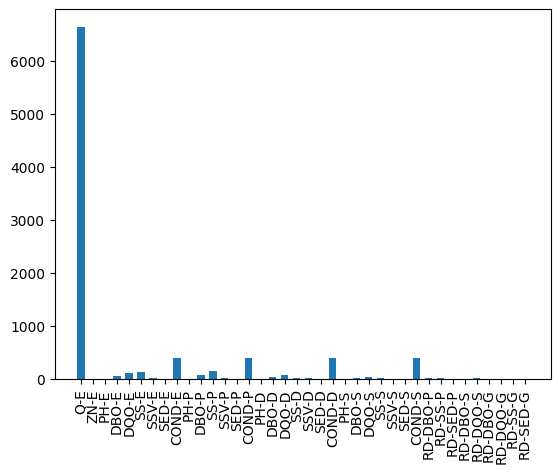

In [7]:
arr_stdev = []
arr_stdev_header = []
for col in df_main:
    arr_stdev.append(stdev(df_main[col].dropna()))
    arr_stdev_header.append(col)

plt.bar(arr_stdev_header, arr_stdev, tick_label=arr_stdev_header, width=.6)
plt.xticks(arr_stdev_header, rotation='vertical')
plt.show()

Empty Values

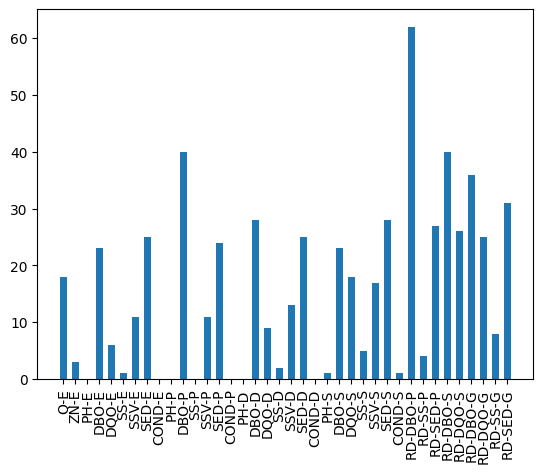

In [8]:
arr_nan = []
arr_nan_header = []
for col in df_main:
    arr_nan.append(df_main[col].isna().sum())
    arr_nan_header.append(col)

plt.bar(arr_nan_header, arr_nan, tick_label=arr_nan_header, width=.6)
plt.xticks(arr_nan_header, rotation='vertical')
plt.show()

In [9]:
df_new = df_main.select_dtypes(exclude=['object'])

In [10]:
df_new

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,44101.0,1.50,7.8,NaN,407.0,166.0,66.3,4.5,2110,7.9,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,39024.0,3.00,7.7,NaN,443.0,214.0,69.2,6.5,2660,7.7,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,32229.0,5.00,7.6,NaN,528.0,186.0,69.9,3.4,1666,7.7,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,35023.0,3.50,7.9,205.0,588.0,192.0,65.6,4.5,2430,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,36924.0,1.50,8.0,242.0,496.0,176.0,64.8,4.0,2110,7.9,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,32723.0,0.16,7.7,93.0,252.0,176.0,56.8,2.3,894,7.7,...,942.0,NaN,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,33535.0,0.32,7.8,192.0,346.0,172.0,68.6,4.0,988,7.8,...,950.0,NaN,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100.0
524,32922.0,0.30,7.4,139.0,367.0,180.0,64.4,3.0,1060,7.5,...,1136.0,NaN,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99.0
525,32190.0,0.30,7.3,200.0,545.0,258.0,65.1,4.0,1260,7.4,...,1326.0,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


# Data Preprocessing

Null (NaN/empty) data

In [11]:
df_main = df_main.dropna(axis=0)

In [12]:
df_main

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
3,35023.0,3.50,7.9,205.0,588.0,192.0,65.6,4.5,2430,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
8,29156.0,2.50,7.7,206.0,451.0,194.0,69.1,4.5,1249,7.7,...,1338.0,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4
9,39246.0,2.00,7.8,172.0,506.0,200.0,69.0,5.0,1865,7.8,...,1616.0,21.2,59.7,90.8,88.4,66.1,89.0,69.0,86.5,99.6
10,42393.0,0.70,7.9,189.0,478.0,230.0,67.0,5.5,1410,8.1,...,1575.0,0.6,45.8,92.0,11.6,25.7,19.6,36.0,43.0,36.4
14,40923.0,3.50,7.6,146.0,329.0,188.0,57.4,2.5,1300,7.6,...,1545.0,32.7,33.3,90.0,82.6,61.3,87.0,71.4,78.2,99.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,32363.0,0.10,7.6,159.0,310.0,146.0,68.5,1.6,1096,7.6,...,1083.0,25.2,61.4,91.2,78.6,65.1,86.8,81.0,89.0,99.4
517,31437.0,0.47,7.6,132.0,304.0,148.0,64.9,2.0,939,7.7,...,1012.0,45.6,60.3,94.4,82.5,72.9,89.4,86.2,91.2,99.5
519,28088.0,0.20,7.5,153.0,307.0,124.0,82.3,2.5,1044,7.6,...,1038.0,40.5,54.4,94.0,89.7,75.5,93.5,85.0,90.3,100.0
520,27838.0,0.13,7.6,179.0,265.0,128.0,71.9,1.8,992,7.6,...,1044.0,13.7,45.0,95.0,87.5,71.3,93.9,79.6,89.1,100.0


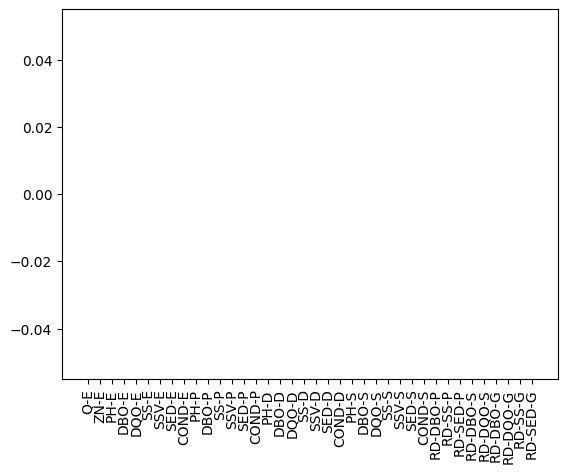

In [13]:
arr_nan = []
arr_nan_header = []
for col in df_main:
    arr_nan.append(df_main[col].isna().sum())
    arr_nan_header.append(col)

plt.bar(arr_nan_header, arr_nan, tick_label=arr_nan_header, width=.6)
plt.xticks(arr_nan_header, rotation='vertical')
plt.show()

Data Scaling

In [14]:
def dataScaling(df):
    scaler = MinMaxScaler()

    arr_scaled = scaler.fit_transform(df_main)

    return arr_scaled

In [15]:
data_scaled = dataScaling(df_main)

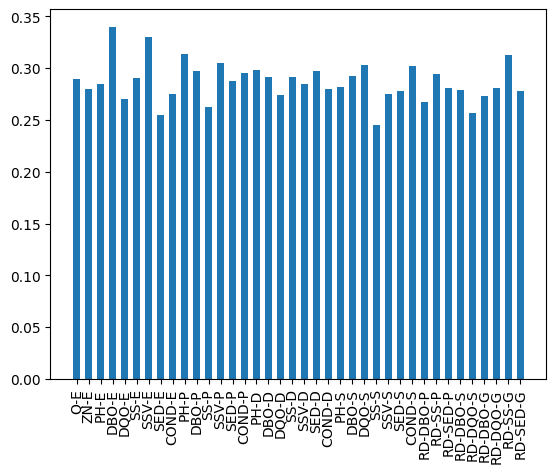

In [16]:
arr_stdev = []
arr_stdev_header = []
for i, col in enumerate(df_main):
    arr_stdev.append(stdev(data_scaled[i]))
    arr_stdev_header.append(col)

plt.bar(arr_stdev_header, arr_stdev, tick_label=arr_stdev_header, width=.6)
plt.xticks(arr_stdev_header, rotation='vertical')
plt.show()

Check for Infinite Value(s)

In [17]:
finite = np.isfinite(df_main)

In [18]:
arr_finite = []
arr_finite_header = ['Columns', 'Sum of Infinite Data']
for col in finite:
    arr_finite.append([col, (finite[col] == True).sum()])

print(tab(arr_finite, headers=arr_finite_header, tablefmt='psql'))

+-----------+------------------------+
| Columns   |   Sum of Infinite Data |
|-----------+------------------------|
| Q-E       |                    380 |
| ZN-E      |                    380 |
| PH-E      |                    380 |
| DBO-E     |                    380 |
| DQO-E     |                    380 |
| SS-E      |                    380 |
| SSV-E     |                    380 |
| SED-E     |                    380 |
| COND-E    |                    380 |
| PH-P      |                    380 |
| DBO-P     |                    380 |
| SS-P      |                    380 |
| SSV-P     |                    380 |
| SED-P     |                    380 |
| COND-P    |                    380 |
| PH-D      |                    380 |
| DBO-D     |                    380 |
| DQO-D     |                    380 |
| SS-D      |                    380 |
| SSV-D     |                    380 |
| SED-D     |                    380 |
| COND-D    |                    380 |
| PH-S      |            

PCA (Reduce Dimension)

In [19]:
pca = PCA(n_components=2)

pc = pca.fit_transform(data_scaled)

<function matplotlib.pyplot.show(close=None, block=None)>

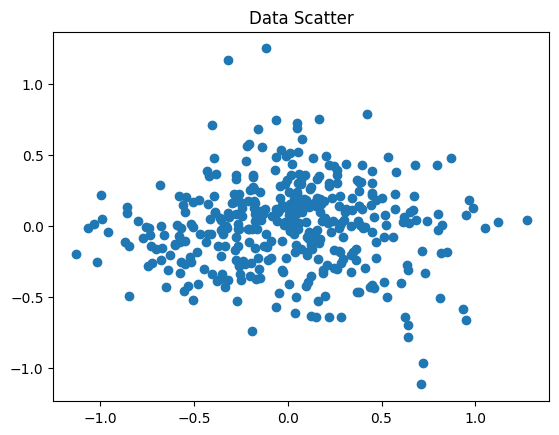

In [20]:
plt.scatter([i[0] for i in pc], [i[1] for i in pc])
plt.title('Data Scatter')
plt.show

# Clustering

## From Scratch

In [21]:
# Global Functions

def euclidean(a, b):
    return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

K-Means Clustering

In [41]:
class KMeansClustering:
    def __init__(self, k, max_iter=100, random_state=42):
        self.k = k
        self.max_iter = max_iter
        self.random_state = random_state

    def initCentroids(self, data):
        np.random.RandomState(self.random_state)
        rand_i = np.random.permutation(data.shape[0])
        centroids = data[rand_i[:self.k]]

        return centroids

    def computeCentroids(self, data, labels):
        centroids = np.zeros((self.k, data.shape[1]))
        for i in range(self.k):
            centroids[i, :] = np.mean(data[labels == i, :], axis=0)

        return centroids

    def computeDistance(self, data, centroids):
        dist = np.zeros((data.shape[0], self.k))
        for i in range(self.k):
            row_norm = np.linalg.norm(data - centroids[i, :], axis=1)
            dist[:, i] = np.square(row_norm)
        
        return dist

    def closestToCluster(self, dist):
        return np.argmin(dist, axis=1)

    def computeSSE(self, data, labels, centroids):
        dist = np.zeros(data.shape[0])
        for i in range(self.k):
            dist[labels == i] = np.linalg.norm(data[labels == i] - centroids[i], axis=1)
        
        return np.sum(np.square(dist))

    def fit(self, data):
        self.centroids = self.initCentroids(data)
        for i in range(self.max_iter):
            temp_centroids = self.centroids
            dist = self.computeDistance(data, temp_centroids)
            self.labels = self.closestToCluster(dist)
            self.centroids = self.computeCentroids(data, self.labels)
            if np.all(temp_centroids == self.centroids):
                break

        self.error = self.computeSSE(data, self.labels, self.centroids)

        # def predict(self, data):
        #     dist = self.computeDistance(data, temp_centroids)
            
        #     return self.closestToClust(dist)

Elbow Method

<function matplotlib.pyplot.show(close=None, block=None)>

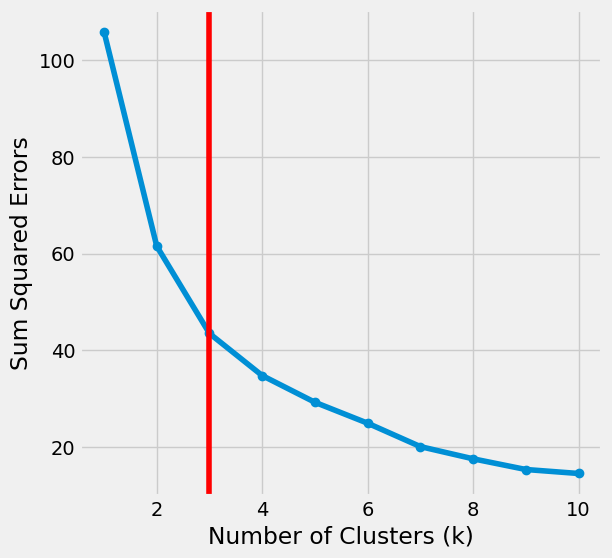

In [62]:
sse = []
for i in range(1, 11):
    kmeans = KMeansClustering(k=i, max_iter=100)
    kmeans.fit(pc)
    sse.append(kmeans.error)

plt.figure(figsize=(6,6))
plt.plot(range(1, 11), sse, '-o')
plt.xlabel(r'Number of Clusters (k)')
plt.ylabel('Sum Squared Errors')
plt.axvline(x=3, color='r')
plt.show

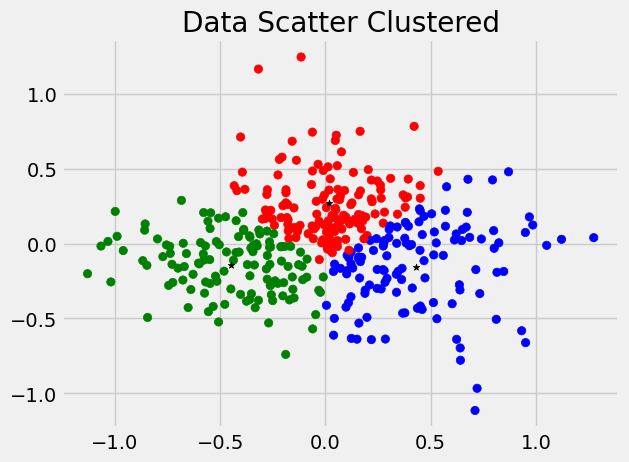

In [67]:
kmeans = KMeansClustering(k=3)
kmeans.fit(pc)

colors = {
    0:'r',
    1:'b',
    2:'g'
}
kmeans_labels = [colors[label] for label in kmeans.labels]

plt.scatter(pc[:, 0], pc[:, 1], c=kmeans_labels)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='*', s=24, c='k')
plt.title('Data Scatter Clustered')
plt.show()

## With Library

K-Means Clustering

In [23]:
kmeans_kwargs = {
    'init':'random'
}

Elbow Method

In [24]:
# Within Cluster Sum of Square
wcss = []
for i in range(1, 11):
    cluster_kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_kmeans.fit(pc)
    wcss.append(cluster_kmeans.inertia_)
    
elbow_k = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

print(f'Jumlah Cluster paling Efisien (Elbow Method): {elbow_k.elbow}')

Jumlah Cluster paling Efisien (Elbow Method): 3


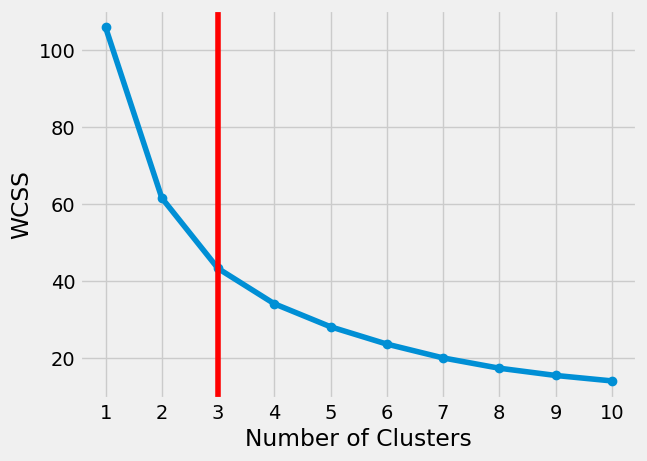

In [25]:
plt.style.use('fivethirtyeight')
plt.plot(range(1, 11), wcss, '-o')
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.axvline(x=elbow_k.elbow, color='r')
plt.show()

Silhouette Method

In [26]:
# # Silhouette Coefficients
# sc = []
# for i in range(2, 11):
#     cluster_kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
#     cluster_kmeans.fit(pc)
#     score = silhouette_score(pc, cluster_kmeans.labels_)
#     print(f'For cluster {i}, silhouette score is {score}')
#     sc.append(score)

In [27]:
# plt.style.use("fivethirtyeight")
# plt.plot(range(2, 11), sc, '-o')
# plt.xticks(range(2, 11))
# plt.xlabel("Number of Clusters")
# plt.ylabel("Silhouette Coefficient")
# plt.axvline(x=2, color='r')
# plt.show()

Clustering (K-Means)

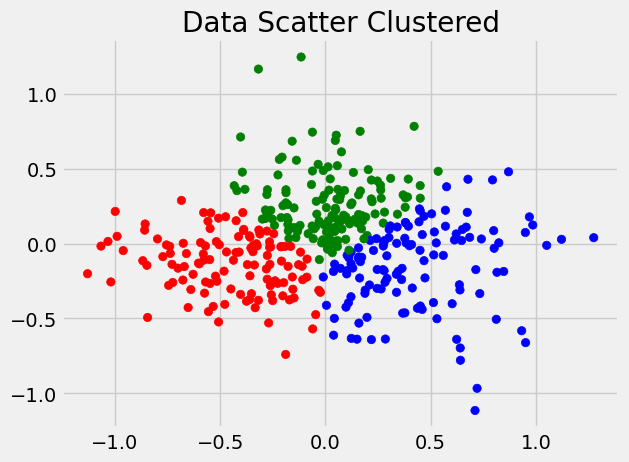

In [28]:
kmeans = KMeans(n_clusters=elbow_k.elbow)
kmeans.fit(pc)

colors = {
    0:'r',
    1:'b',
    2:'g'
}
kmeans_labels = [colors[label] for label in kmeans.labels_]

plt.scatter(pc[:, 0], pc[:, 1], c=kmeans_labels)
plt.title('Data Scatter Clustered')
plt.show()

Hierarchical Clustering

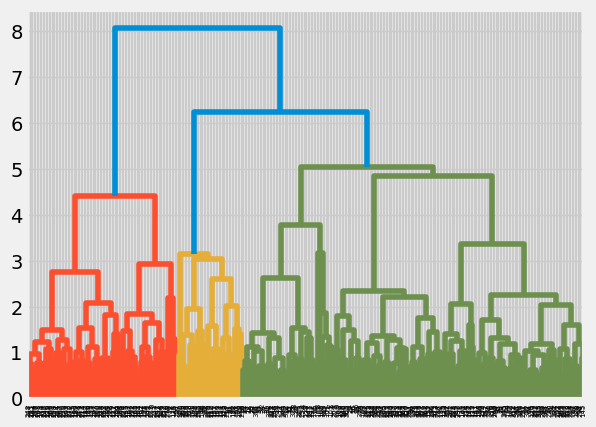

In [29]:
cluster_linkage = linkage(data_scaled, method='ward', metric='euclidean')

dendrogram(cluster_linkage)
# plt.axhline(y=3, c='k')
plt.show()

# References:
- https://www.bradleysawler.com/engineering/ml-clustering-of-a-waste-water-treatment-plant/
- https://medium.com/@afrizalfir/kmeans-clustering-dan-implementasinya-5e967dc604cf
- https://predictivehacks.com/k-means-elbow-method-code-for-python/
- https://realpython.com/k-means-clustering-python/
- https://lms.telkomuniversity.ac.id/mod/page/view.php?id=2589254 